Anna Wojciechowska, Oslo, January 2023
test details:  
**tap water vertical pipe test**   
date: 4th January  2023 20:44 - 21:15 
place: my Oslo house  
[WH-0180 meteo station](https://www.bruksanvisningpdf.no/clas-ohlson/wh-1080/bruksanvisning?p=3) 979 [hPa]  (?)
sensor data (absolute pressure)    
[cm] - [mbar]  
0    - 999-1000 (baseline)air # I cannot explain this  
23   - 990  
53   - 1024  
104  - 1084   
130  - 1111 # I am not sure about this point since this is the moment when its stopped working due to leaking 
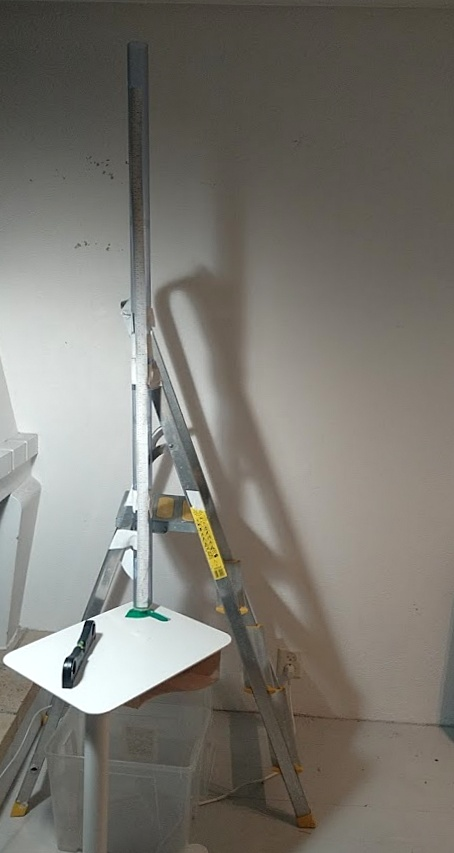

In [1]:
import pandas as pd
import statsmodels.formula.api as smf  # module to run ordinary least squares analysis
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.DataFrame(columns=['water_level_cm', 'pressure_mb'])
df.loc[0] = [23, 990]
df.loc[1] = [53, 1024]
df.loc[2] = [104, 1085]
df.loc[3] = [130, 1111] 
df.head()

,water_level_cm,pressure_mb
0,23,990
1,53,1024
2,104,1085
3,130,1111


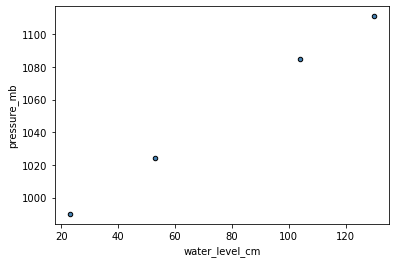

In [3]:
_ = df.plot.scatter(x='water_level_cm', y='pressure_mb', color = 'steelblue', edgecolor = 'black')

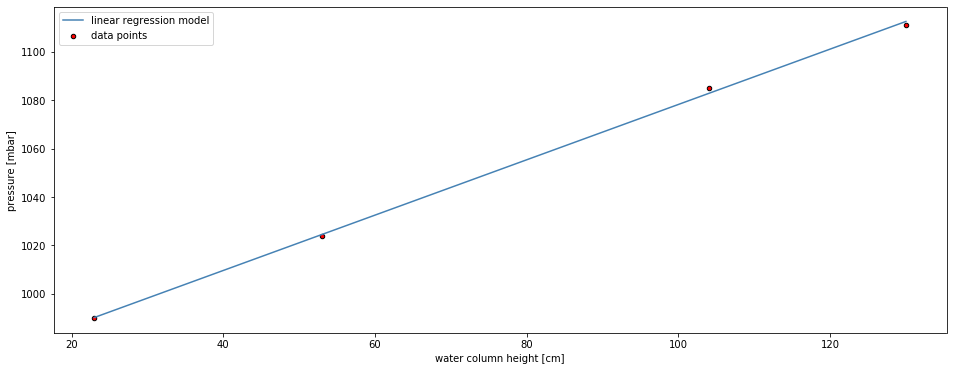

In [4]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 1, 1)

linfit = smf.ols(formula=' pressure_mb ~ water_level_cm', data=df).fit()
intercept, slope = linfit.params

plt.scatter(x=df['water_level_cm'],y=df['pressure_mb'],s=20,alpha=1,marker='o', color = 'red', edgecolor = 'black',  label  = 'data points')
x = np.linspace(df['water_level_cm'].min(), df['water_level_cm'].max(), 100)
y = intercept + slope*x
ax.plot(x,y, 'steelblue', label = 'linear regression model')
ax.set_ylabel('pressure [mbar]')
ax.set_xlabel('water column height [cm]')

_= ax.legend()



In [5]:
#tutaj check assumptions

In [6]:
linfit.summary()

/home/anna/.local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            pressure_mb   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2468.
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           0.000405
Time:                        12:07:45   Log-Likelihood:                -6.9188
No. Observations:                   4   AIC:                             17.84
Df Residuals:                       2   BIC:                             16.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        963.8860      2.028    475.305      0.000     955.161     972.612
water_level_cm     1.1434      0.023     49.679      0.000       1.044       1.242
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.848
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.451
Skew:                           0.684   Prob(JB):                        0.798
Kurtosis:                       2.087   Cond. No.                         185.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""